In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("Final_Train.xlsx")
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [129]:
round(df.isnull().sum()/len(df)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

In [130]:
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

In [131]:
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [132]:
df["Rating"].fillna("-99%",inplace=True)
df["Rating"] = df["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df["Rating"] = pd.cut(df["Rating"],bins=bins,labels=labels,include_lowest=True)

In [133]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [134]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
df.drop("Qualification",axis=1,inplace=True)

In [135]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

In [136]:
df = pd.get_dummies(df,columns=["City","Profile"],prefix=["City","Profile"])

In [137]:
df.drop("Miscellaneous_Info",axis=1,inplace=True)

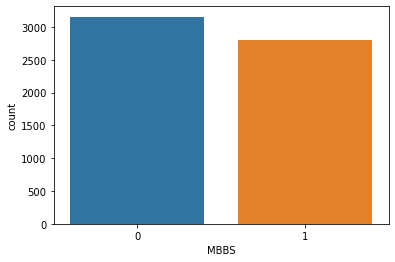

0    3156
1    2805
Name: MBBS, dtype: int64


In [138]:
sns.countplot(x='MBBS',data=df)
plt.show()

print(df['MBBS'].value_counts())

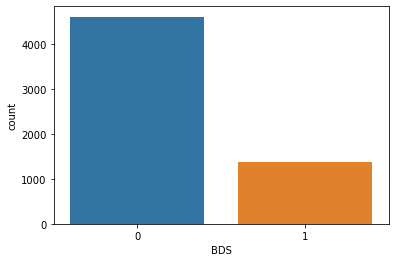

0    4599
1    1362
Name: BDS, dtype: int64


In [139]:
sns.countplot(x='BDS',data=df)
plt.show()

print(df['BDS'].value_counts())

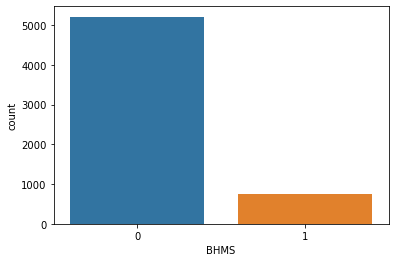

0    5213
1     748
Name: BHMS, dtype: int64


In [140]:
sns.countplot(x='BHMS',data=df)
plt.show()

print(df['BHMS'].value_counts())

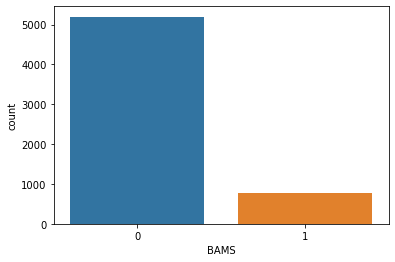

0    3156
1    2805
Name: MBBS, dtype: int64


In [141]:
sns.countplot(x='BAMS',data=df)
plt.show()

print(df['MBBS'].value_counts())

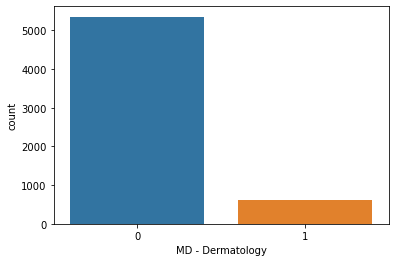

0    5356
1     605
Name: MD - Dermatology, dtype: int64


In [142]:
sns.countplot(x='MD - Dermatology',data=df)
plt.show()

print(df['MD - Dermatology'].value_counts())

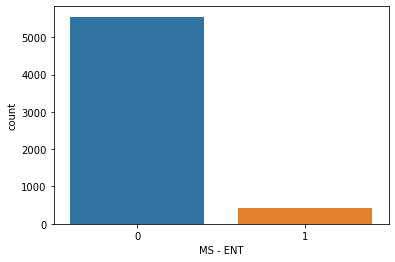

0    5550
1     411
Name: MS - ENT, dtype: int64


In [143]:
sns.countplot(x='MS - ENT',data=df)
plt.show()

print(df['MS - ENT'].value_counts())

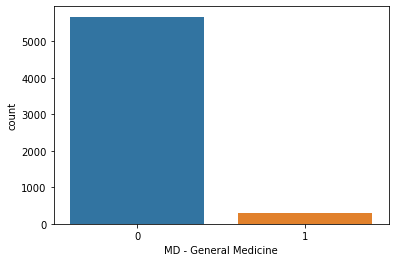

0    5676
1     285
Name: MD - General Medicine, dtype: int64


In [144]:
sns.countplot(x='MD - General Medicine',data=df)
plt.show()

print(df['MD - General Medicine'].value_counts())

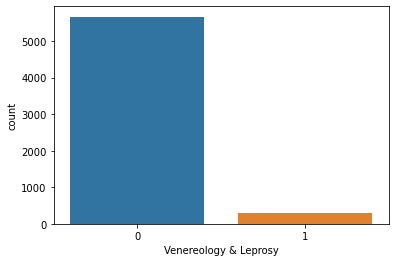

0    5668
1     293
Name: Venereology & Leprosy, dtype: int64


In [145]:
sns.countplot(x='Venereology & Leprosy',data=df)
plt.show()

print(df['Venereology & Leprosy'].value_counts())

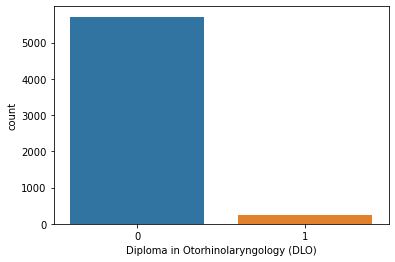

0    5712
1     249
Name: Diploma in Otorhinolaryngology (DLO), dtype: int64


In [146]:
sns.countplot(x='Diploma in Otorhinolaryngology (DLO)',data=df)
plt.show()

print(df['Diploma in Otorhinolaryngology (DLO)'].value_counts())

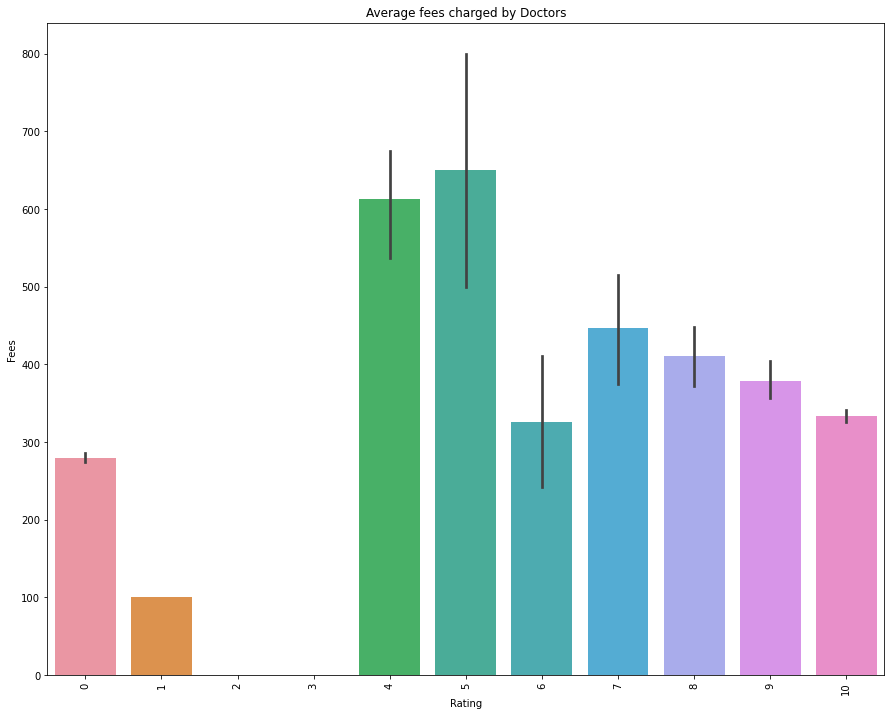

0     3302
10    2222
9      280
8       98
7       32
6       19
4        4
5        3
1        1
3        0
2        0
Name: Rating, dtype: int64


In [147]:
plt.figure(figsize=(15,12))
sns.barplot(x='Rating',y='Fees',data=df)
plt.xticks(rotation='vertical')
plt.title('Average fees charged by Doctors')
plt.show()
print(df["Rating"].value_counts())

Here, lowest rating is 0 and the highest is 10. The doctors with low rating have high fees and high rating have low fees. This can happen, because people might rate high to those doctors who charges less and vise versa.

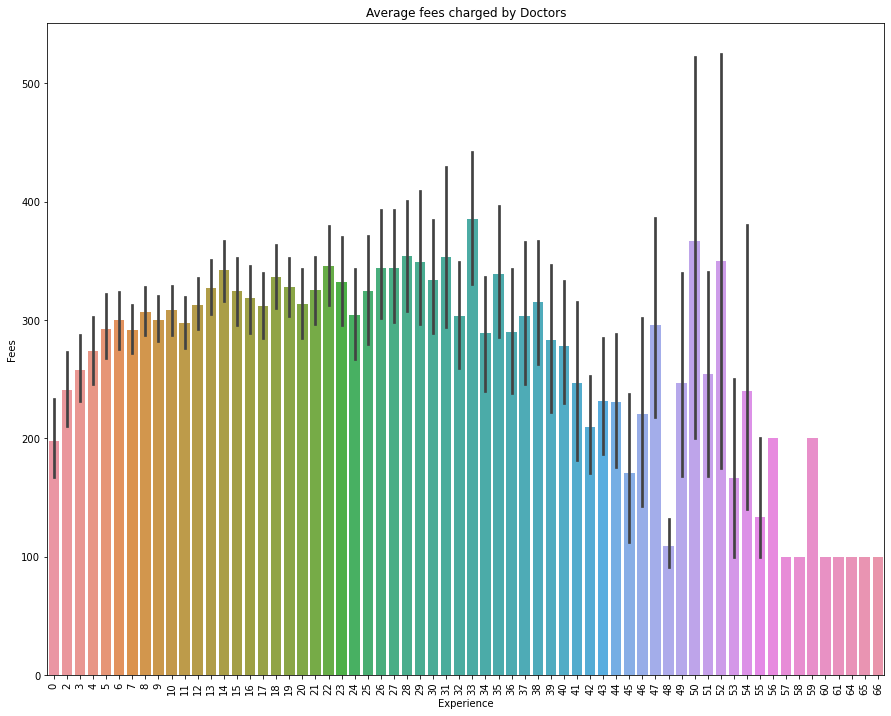

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


In [148]:
plt.figure(figsize=(15,12))
sns.barplot(x='Experience',y='Fees',data=df)
plt.xticks(rotation='vertical')
plt.title('Average fees charged by Doctors')
plt.show()
print(df["Experience"].value_counts())

Mostly we think that experienced doctors charge higher but it is not so, we can see that with increasing experience the fees got reduced.

In [149]:
X = df.drop("Fees",axis=1)
y = df["Fees"]
# Encoding
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [162]:
model=[LinearRegression(),SVR(gamma="scale")]
for m in model:
    m.fit(scaler.transform(X_train),y_train)

In [163]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = m.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.7754688919000071

In [164]:
scorer = make_scorer(score,greater_is_better=True)
# Hyperparameter tunning
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(m,param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)
reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(score))

In [165]:
y_pred_tuned = reg.predict(scaler.transform(X_test))
score(y_pred_tuned,y_test)

0.8136414083060557